Prepare this data to model with multivariable regression (including data cleaning if necessary) according to this specification:<br>

**Propertycrime=α+Population+Population2+Murder+Robbery**<br>
 
The 'population' variable is already set for you, but you will need to create the last three features. Robbery and Murder are currently continuous variables. For this model, please use these variables to create categorical features where values greater than 0 are coded 1, and values equal to 0 are coded 0. You'll use this data and model in a later assignment- for now, just write the code you need to get the data ready. Don't forget basic data cleaning procedures, either! Do some graphing to see if there are any anomalous cases, and decide how you want to deal with them.

In [28]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

df=pd.read_excel('table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls',skiprows=[0,1,2,3])
df.columns = [c.replace(' ', '') for c in df.columns]
df.columns

Index(['City', 'Population', 'Violent\ncrime',
       'Murderand\nnonnegligent\nmanslaughter', 'Rape\n(revised\ndefinition)1',
       'Rape\n(legacy\ndefinition)2', 'Robbery', 'Aggravated\nassault',
       'Property\ncrime', 'Burglary', 'Larceny-\ntheft',
       'Motor\nvehicle\ntheft', 'Arson3'],
      dtype='object')

In [3]:
murder=df['Murderand\nnonnegligent\nmanslaughter']
robbery=df['Robbery']
print(murder.value_counts())
print(robbery.value_counts())

0.0      299
1.0       31
2.0        4
7.0        2
3.0        2
8.0        2
335.0      1
6.0        1
21.0       1
4.0        1
42.0       1
5.0        1
10.0       1
47.0       1
Name: Murderand\nnonnegligent\nmanslaughter, dtype: int64
0.0        139
1.0         56
2.0         25
3.0         23
4.0         14
5.0         10
16.0         7
6.0          6
13.0         5
11.0         5
8.0          5
12.0         4
7.0          3
10.0         3
9.0          3
31.0         2
26.0         2
19.0         2
17.0         2
76.0         1
48.0         1
29.0         1
22.0         1
227.0        1
101.0        1
60.0         1
918.0        1
1322.0       1
51.0         1
19170.0      1
390.0        1
28.0         1
102.0        1
145.0        1
400.0        1
34.0         1
203.0        1
23.0         1
100.0        1
21.0         1
166.0        1
81.0         1
15.0         1
150.0        1
228.0        1
47.0         1
24.0         1
25.0         1
20.0         1
39.0         1
204.0     

/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([345.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([  0. ,  33.5,  67. , 100.5, 134. , 167.5, 201. , 234.5, 268. ,
        301.5, 335. ]),
 <a list of 10 Patch objects>)

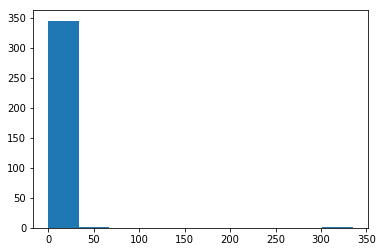

In [4]:
plt.hist(murder)

/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([347.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([    0.,  1917.,  3834.,  5751.,  7668.,  9585., 11502., 13419.,
        15336., 17253., 19170.]),
 <a list of 10 Patch objects>)

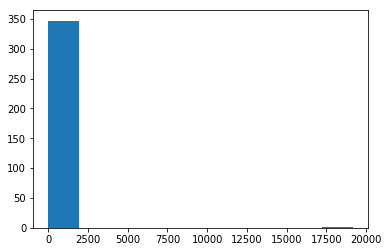

In [5]:
plt.hist(robbery)

In [19]:
features=pd.DataFrame()
features['murder']=np.where(murder==0,0,1)
features['robbery']=np.where(robbery==0,0,1)

In [8]:
# murder_dummy=pd.get_dummies(features['murder'],drop_first=True)
# robbery_dummy=pd.get_dummies(robbery_cat,drop_first=True)

In [24]:
features['population']=df['Population']
features['propertycrime']=df['Property\ncrime']

In [25]:
features['population_sq']=df['Population']*df['Population']

In [26]:
from patsy import dmatrices

y, X = dmatrices('propertycrime ~ (murder)+(robbery)+(population)+(population_sq)', features, return_type="dataframe")

# Instantiate and fit our model.
regr = linear_model.LinearRegression()
regr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
regr.score(X,y)

0.9961247104986592

The score for the explanation of variance is 99%, which means this model explains 99% of propertycrime.